In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax

In [2]:
df = pd.read_csv("lastfm.csv")
df[0:18]

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
5,1,schandmaul,f,Germany
6,1,edguy,f,Germany
7,1,jack johnson,f,Germany
8,1,eluveitie,f,Germany
9,1,the killers,f,Germany


In [22]:
def apriori_analyze(data, metric='leverage', min_support=0.01, sort_by='confidence'):
    groupped = data.groupby('user')['artist'].apply(';'.join)
    binary_data = groupped.str.get_dummies(";").astype(bool)
    
    frequent_itemsets = apriori(binary_data, min_support=min_support, use_colnames=True)
    
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=0.01)
    
    rules_sorted = None

    if (sort_by):
        rules_sorted = rules.sort_values(by=sort_by, ascending=False)

    result = rules_sorted if rules_sorted is not None else rules
    
    return result[['antecedents', 'consequents', 'support', 'confidence', 'leverage', 'lift']]

## 2. Подготовить набор для поиска ассоциативных правил

In [4]:
# Группировка по пользователям с объединением исполнителей через ';'
groupped = df.groupby('user')['artist'].apply(';'.join)
# Бинаризация значений
binary_data = groupped.str.get_dummies(";").astype(bool)

## 3. Найти характерные комбинации музыкальных коллективов

In [5]:
# Применим априорный алгоритм для поиска частых наборов музыкальных коллективов
frequent_itemsets_apriori = apriori(binary_data, min_support=0.02, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="leverage", min_threshold=0.01)
rules_apriori_sorted = rules_apriori.sort_values(by='confidence', ascending=False)
rules_apriori_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
43,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676,0.778478
58,(snow patrol),(coldplay),0.050400,0.158533,0.026467,0.525132,3.312441,0.018477,1.772002,0.735160
16,(beck),(radiohead),0.057467,0.180267,0.029267,0.509281,2.825152,0.018907,1.670473,0.685426
89,(iron maiden),(metallica),0.059267,0.111333,0.029600,0.499438,4.485966,0.023002,1.775336,0.826039
33,(bob dylan),(the beatles),0.069333,0.177867,0.034467,0.497115,2.794877,0.022135,1.634835,0.690046
...,...,...,...,...,...,...,...,...,...,...
145,(radiohead),(oasis),0.180267,0.058533,0.021667,0.120192,2.053399,0.011115,1.070082,0.625817
81,(radiohead),(franz ferdinand),0.180267,0.059333,0.020867,0.115754,1.950917,0.010171,1.063807,0.594609
153,(radiohead),(pixies),0.180267,0.049800,0.020667,0.114645,2.302108,0.011689,1.073242,0.689999
20,(radiohead),(belle and sebastian),0.180267,0.049200,0.020600,0.114275,2.322666,0.011731,1.073471,0.694690


### Сопоставим с выборками по странам и полу

In [6]:
# Подгруппы по странам
df_germany = df[df['country'] == 'Germany']
df_us = df[df['country'] == 'United States']

# Подгруппы по полу
df_male = df[df['sex'] == 'm']
df_female = df[df['sex'] == 'f']

In [7]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [8]:
apriori_germany = apriori_analyze(df_germany)
apriori_germany

,antecedents,consequents,support,confidence,leverage,lift
1904,"(in extremo, marilyn manson)",(rammstein),0.012729,0.888889,0.010633,6.072464
1711,"(evanescence, farin urlaub)",(die Ärzte),0.015115,0.826087,0.011549,4.238332
1830,"(disturbed, papa roach)",(koЯn),0.015911,0.800000,0.014297,9.858824
1565,"(coldplay, farin urlaub)",(die Ärzte),0.015115,0.791667,0.011394,4.061735
1395,"(beatsteaks, farin urlaub)",(die Ärzte),0.017502,0.785714,0.013160,4.031195
...,...,...,...,...,...,...
1714,(die Ärzte),"(evanescence, farin urlaub)",0.015115,0.077551,0.011549,4.238332
1745,(die Ärzte),"(green day, red hot chili peppers)",0.015115,0.077551,0.010153,3.046301
1751,(die Ärzte),"(green day, the offspring)",0.014320,0.073469,0.010443,3.694041
1271,(die Ärzte),"(ac/dc, die toten hosen)",0.014320,0.073469,0.010288,3.551962


In [20]:
apriori_us = apriori_analyze(df_us)
apriori_us

,antecedents,consequents,support,confidence,leverage,lift
8655,"(beck, death cab for cutie, the beatles)",(radiohead),0.012737,0.925000,0.009556,4.004657
8754,"(beck, the beatles, the shins)",(radiohead),0.014802,0.860000,0.010826,3.723249
8837,"(broken social scene, death cab for cutie, the beatles)",(radiohead),0.012048,0.853659,0.008788,3.695794
6849,"(snow patrol, the shins)",(death cab for cutie),0.013769,0.833333,0.010851,4.718973
9327,"(led zeppelin, radiohead, red hot chili peppers)",(the beatles),0.010327,0.833333,0.006974,3.079941
...,...,...,...,...,...,...
3556,(the beatles),(relient k),0.010327,0.038168,0.001479,1.167135
3501,(the beatles),(rammstein),0.010327,0.038168,0.001851,1.218438
9016,(the beatles),"(death cab for cutie, radiohead, elliott smith)",0.010327,0.038168,0.005763,2.262814
6281,(the beatles),"(david bowie, the smiths)",0.010327,0.038168,0.005111,1.979962


In [10]:
apriori_male = apriori_analyze(df_male)
apriori_male

,antecedents,consequents,support,confidence,leverage,lift
113,(keane),(coldplay),0.018656,0.641975,0.014538,4.529989
495,"(radiohead, bob dylan)",(the beatles),0.014800,0.589286,0.010502,3.443368
254,(t.i.),(kanye west),0.011571,0.575893,0.010286,9.005090
316,(megadeth),(metallica),0.019822,0.544335,0.015171,4.261791
510,"(system of a down, slipknot)",(koЯn),0.011122,0.543860,0.010025,10.139617
...,...,...,...,...,...,...
509,(radiohead),"(coldplay, the beatles)",0.017132,0.096367,0.010419,2.552017
435,(radiohead),(sonic youth),0.017132,0.096367,0.010052,2.419818
80,(radiohead),(blur),0.016952,0.095358,0.011084,2.888991
507,(radiohead),"(muse, coldplay)",0.016414,0.092331,0.010466,2.759780


In [11]:
apriori_female = apriori_analyze(df_female)
apriori_female

,antecedents,consequents,support,confidence,leverage,lift
854,"(bright eyes, sufjan stevens)",(death cab for cutie),0.012984,0.757576,0.010830,6.027736
951,"(coldplay, the smashing pumpkins)",(radiohead),0.014542,0.717949,0.010744,3.829391
861,"(lady gaga, rihanna)",(britney spears),0.012464,0.666667,0.010780,7.398655
878,"(coldplay, sufjan stevens)",(death cab for cutie),0.012464,0.666667,0.010114,5.304408
910,"(keane, the killers)",(coldplay),0.014801,0.655172,0.010120,3.161741
...,...,...,...,...,...,...
1027,(radiohead),"(the shins, sufjan stevens)",0.015061,0.080332,0.010047,3.003496
943,(radiohead),"(the cure, coldplay)",0.014801,0.078947,0.010128,3.166941
952,(radiohead),"(coldplay, the smashing pumpkins)",0.014542,0.077562,0.010744,3.829391
904,(coldplay),"(franz ferdinand, the killers)",0.015321,0.073935,0.010047,2.905337


## 4. Сравнить результаты поиска характерных комбинаций разных алгоритмов (apriori, fpgrowth, fpmax).

### apriori

In [12]:
rules_apriori_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
43,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676,0.778478
58,(snow patrol),(coldplay),0.050400,0.158533,0.026467,0.525132,3.312441,0.018477,1.772002,0.735160
16,(beck),(radiohead),0.057467,0.180267,0.029267,0.509281,2.825152,0.018907,1.670473,0.685426
89,(iron maiden),(metallica),0.059267,0.111333,0.029600,0.499438,4.485966,0.023002,1.775336,0.826039
33,(bob dylan),(the beatles),0.069333,0.177867,0.034467,0.497115,2.794877,0.022135,1.634835,0.690046
...,...,...,...,...,...,...,...,...,...,...
145,(radiohead),(oasis),0.180267,0.058533,0.021667,0.120192,2.053399,0.011115,1.070082,0.625817
81,(radiohead),(franz ferdinand),0.180267,0.059333,0.020867,0.115754,1.950917,0.010171,1.063807,0.594609
153,(radiohead),(pixies),0.180267,0.049800,0.020667,0.114645,2.302108,0.011689,1.073242,0.689999
20,(radiohead),(belle and sebastian),0.180267,0.049200,0.020600,0.114275,2.322666,0.011731,1.073471,0.694690


### fpgrowth

In [13]:
frequent_itemsets_fpgrowth = fpgrowth(binary_data, min_support=0.02, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.01)
rules_fpgrowth_sorted = rules_fpgrowth.sort_values(by='confidence', ascending=False)
rules_fpgrowth_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
191,(keane),(coldplay),0.034933,0.158533,0.022267,0.637405,4.020634,0.016729,2.320676,0.778478
58,(snow patrol),(coldplay),0.050400,0.158533,0.026467,0.525132,3.312441,0.018477,1.772002,0.735160
54,(beck),(radiohead),0.057467,0.180267,0.029267,0.509281,2.825152,0.018907,1.670473,0.685426
67,(iron maiden),(metallica),0.059267,0.111333,0.029600,0.499438,4.485966,0.023002,1.775336,0.826039
101,(bob dylan),(the beatles),0.069333,0.177867,0.034467,0.497115,2.794877,0.022135,1.634835,0.690046
...,...,...,...,...,...,...,...,...,...,...
129,(radiohead),(franz ferdinand),0.180267,0.059333,0.020867,0.115754,1.950917,0.010171,1.063807,0.594609
97,(the beatles),(oasis),0.177867,0.058533,0.020400,0.114693,1.959442,0.009989,1.063435,0.595585
145,(radiohead),(pixies),0.180267,0.049800,0.020667,0.114645,2.302108,0.011689,1.073242,0.689999
188,(radiohead),(belle and sebastian),0.180267,0.049200,0.020600,0.114275,2.322666,0.011731,1.073471,0.694690


### fpmax

In [14]:
frequent_itemsets_fpmax = fpmax(binary_data, min_support=0.02, use_colnames=True)
frequent_itemsets_fpmax.sort_values(by='support', ascending=False)

,support,itemsets
259,0.064067,(kanye west)
256,0.062733,(amy winehouse)
255,0.062200,(the prodigy)
254,0.061933,(nightwish)
244,0.059000,(the offspring)
...,...,...
1,0.020133,(soundtrack)
264,0.020067,"(arctic monkeys, bloc party)"
313,0.020067,"(linkin park, muse)"
0,0.020067,(lostprophets)


## 5. Вывести правила с наилучшими оценками качества по выборке Германии

In [15]:
rules_germany_sorted = apriori_analyze(df_germany, sort_by=['confidence', 'lift', 'leverage', 'support'])
rules_germany_sorted

,antecedents,consequents,support,confidence,leverage,lift
1904,"(in extremo, marilyn manson)",(rammstein),0.012729,0.888889,0.010633,6.072464
1711,"(evanescence, farin urlaub)",(die Ärzte),0.015115,0.826087,0.011549,4.238332
1830,"(disturbed, papa roach)",(koЯn),0.015911,0.800000,0.014297,9.858824
1565,"(coldplay, farin urlaub)",(die Ärzte),0.015115,0.791667,0.011394,4.061735
1395,"(beatsteaks, farin urlaub)",(die Ärzte),0.017502,0.785714,0.013160,4.031195
...,...,...,...,...,...,...
1427,(die Ärzte),"(beatsteaks, the kooks)",0.015115,0.077551,0.010153,3.046301
1745,(die Ärzte),"(green day, red hot chili peppers)",0.015115,0.077551,0.010153,3.046301
1751,(die Ärzte),"(green day, the offspring)",0.014320,0.073469,0.010443,3.694041
1271,(die Ärzte),"(ac/dc, die toten hosen)",0.014320,0.073469,0.010288,3.551962


### Проанализировать взаимосвязь оценок

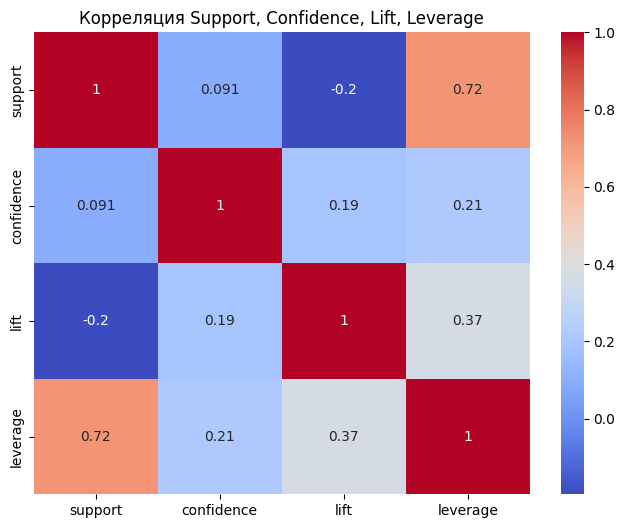

In [21]:
metrics = ['support', 'confidence', 'lift', 'leverage']
correlation_matrix = rules_germany_sorted[metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляция Support, Confidence, Lift, Leverage")
plt.show()

#### Анализ

— Высокий показатель support увеличивает вероятность того, что эта комбинация исполнителей действительно имеет значимую взаимосвязь (высокий leverage), а не является результатом случайного совпадения. Таким образом, можно сказать, что в этих данных исполнители, которые часто встречаются в плейлистах вместе, с высокой вероятностью имеют взаимозависимость, а не случайную совместную встречаемость. \
— Отрицательная корреляция между support и lift (-0.5) означает, что когда поддержка комбинации событий увеличивается, показатель Lift уменьшается, и наоборот. Часто встречающиеся комбинации (высокий support) не обязательно указывают на сильную взаимозависимость между элементами. Например, если два популярных исполнителя часто встречаются в плейлистах просто потому, что они популярны, это может приводить к высокой поддержке. Однако, если их аудитории не проявляют сильной зависимости (например, они могут быть популярны среди разных групп людей), Lift может быть низким. Lift оценивает "силу" связи. Если комбинация исполнителей встречается так часто, что это уже почти ожидаемое явление, Lift снижается, так как он сравнивает фактическую частоту с ожидаемой. Таким образом, частое совместное появление не всегда означает, что эти исполнители связаны сильной зависимостью.

**Общие выводы**:
* Среди немецких пользователей можно выявить устойчивые ассоциации между музыкальными коллективами, которые часто встречаются вместе, что подтверждается умеренной корреляцией между lift и leverage.
* Популярные артисты не всегда образуют сильные ассоциации, что можно наблюдать из умеренной корреляции между support и lift. Это может указывать на то, что некоторые популярные музыкальные коллективы просто универсально известны и не образуют значимых связей с другими артистами.

## 6. Найти характерные комбинации и ассоциативные правила длины не менее 5 признаков. 

In [156]:
# Применим априорный алгоритм для поиска частых наборов музыкальных коллективов
frequent_itemsets_apriori = apriori(binary_data, min_support=0.005, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="leverage", min_threshold=0.005)
# rules_apriori_sorted = rules_apriori.sort_values(by='lift', ascending=False)
# rules_apriori_sorted

In [157]:
min_length = 4
long_rules = rules_apriori[(rules_apriori['antecedents'].apply(len) + rules_apriori['consequents'].apply(len)) >= min_length]
short_rules = rules_apriori[(rules_apriori['antecedents'].apply(len) + rules_apriori['consequents'].apply(len)) < min_length]


In [63]:
long_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage']]
# .sort_values(by='confidence', ascending=False)

,antecedents,consequents,support,confidence,lift,leverage
5808,"(arctic monkeys, the killers, coldplay)",(muse),0.006533,0.529730,4.644036,0.005127
5809,"(arctic monkeys, muse, coldplay)",(the killers),0.006533,0.563218,5.735421,0.005394
5810,"(the killers, coldplay, muse)",(arctic monkeys),0.006533,0.431718,5.720646,0.005391
5811,"(arctic monkeys, the killers)","(muse, coldplay)",0.006533,0.259259,6.681940,0.005556
5812,"(arctic monkeys, coldplay)","(the killers, muse)",0.006533,0.240786,8.098192,0.005727
5813,"(arctic monkeys, muse)","(the killers, coldplay)",0.006533,0.273743,6.665820,0.005553
5814,"(the killers, coldplay)","(arctic monkeys, muse)",0.006533,0.159091,6.665820,0.005553
5815,"(the killers, muse)","(arctic monkeys, coldplay)",0.006533,0.219731,8.098192,0.005727
5816,"(muse, coldplay)","(arctic monkeys, the killers)",0.006533,0.168385,6.681940,0.005556
5817,(arctic monkeys),"(the killers, coldplay, muse)",0.006533,0.086572,5.720646,0.005391


In [64]:
short_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage']]
# .sort_values(by='confidence', ascending=False)

,antecedents,consequents,support,confidence,lift,leverage
0,(50 cent),(2pac),0.005867,0.269113,11.837822,0.005371
1,(2pac),(50 cent),0.005867,0.258065,11.837822,0.005371
2,(eminem),(2pac),0.007333,0.163934,7.211192,0.006316
3,(2pac),(eminem),0.007333,0.322581,7.211192,0.006316
4,(jay-z),(2pac),0.006267,0.206593,9.087687,0.005577
...,...,...,...,...,...,...
5803,(the rolling stones),"(u2, the beatles)",0.007067,0.112288,5.166632,0.005699
5804,"(the strokes, the killers)",(the kooks),0.006000,0.322581,6.674082,0.005101
5805,"(the killers, the kooks)",(the strokes),0.006000,0.328467,6.082725,0.005014
5806,(the strokes),"(the killers, the kooks)",0.006000,0.111111,6.082725,0.005014


### Сравнить оценки качества таких правил с короткими правилами

**1. Confidence:**
* Длинные правила: У большинства длинных правил уровень уверенности ниже. Например, уверенность для длинных правил варьируется от 0.056 до 0.610, причём много правил имеют уверенность менее 0.2, что говорит о том, что длинные правила менее надёжны для предсказания последовательностей.
* Короткие правила: Короткие правила имеют более высокую уверенность. Например, уверенность варьируется от 0.038 до 0.756, а многие правила имеют значение более 0.5, что делает их более надёжными для предсказаний.

**2. Lift:**
* Длинные правила: У многих длинных правил высокий lift, особенно если уверенность ниже. Lift для длинных правил колеблется от 3.88 до 9.70, что показывает более высокую взаимозависимость элементов, хотя это не всегда указывает на сильную уверенность.
* Короткие правила: Lift для коротких правил варьируется от 3.39 до 16.35. В частности, правило с Beyoncé и The Pussycat Dolls → Rihanna имеет lift 16.35, что означает сильную корреляцию между этими элементами. Высокий lift также говорит о том, что появление одного элемента значительно повышает вероятность появления другого.


**3. Leverage:**
* Длинные правила: Значение leverage у длинных правил, как правило, ниже, например, от 0.0050 до 0.0058, что говорит о слабом приросте полезности для предсказания.
* Короткие правила: Для коротких правил leverage может достигать 0.0062, что свидетельствует о большем приросте точности, особенно для правил с высоким confidence и lift.

**Вывод:**
* Короткие правила демонстрируют более высокие confidence и lift, что делает их более надёжными для предсказания конкретных результатов.
* Длинные правила имеют более высокий lift, но более низкие значения уверенности и leverage, что указывает на высокую взаимозависимость, но слабую предсказательную силу. Длинные правила полезны для поиска скрытых и сложных взаимосвязей между элементами, но менее надёжны в прямых предсказаниях.

## 7. Тривиальные и нетривиальные правила    

### Тривиальные правила
**(keane, snow patrol) → (coldplay)**  [Confidence: 0.756, Lift: 4.77]
Keane и Snow Patrol — это британские рок-группы, которые популярны среди тех же слушателей, что и Coldplay. Все три группы играют в похожем жанре.


**(2pac) → (50 cent)** [Support: 0.005867, Confidence: 0.258065, Lift: 11.837822]
2Pac и 50 Cent оба известны в жанре рэп, и их аудитория часто пересекается. 


### Нетривиальные правила

**(the doors, led zeppelin) → (pink floyd, the beatles)** [Support: 0.006067, Confidence: 0.339552, Lift: 8.560140]
The Doors обычно связаны с психоделическим роком, а The Beatles имеют разнообразный стиль, не всегда пересекающийся с Pink Floyd. Тем не менее, правило демонстрирует неожиданную и глубокую музыкальную взаимосвязь.


**(coldplay, bloc party) → (the killers, muse)** [Support: 0.005733, Confidence: 0.249275, Lift: 8.383701]
Bloc Party — менее популярная группа по сравнению с The Killers и Muse, но ассоциация с ними предполагает, что существует определённая музыкальная взаимосвязь между этими жанрами, что не столь очевидно.


## 8. Анализ зависимости оценок качества правил от поддержки и длины правил

### График зависимости leverage от поддержки

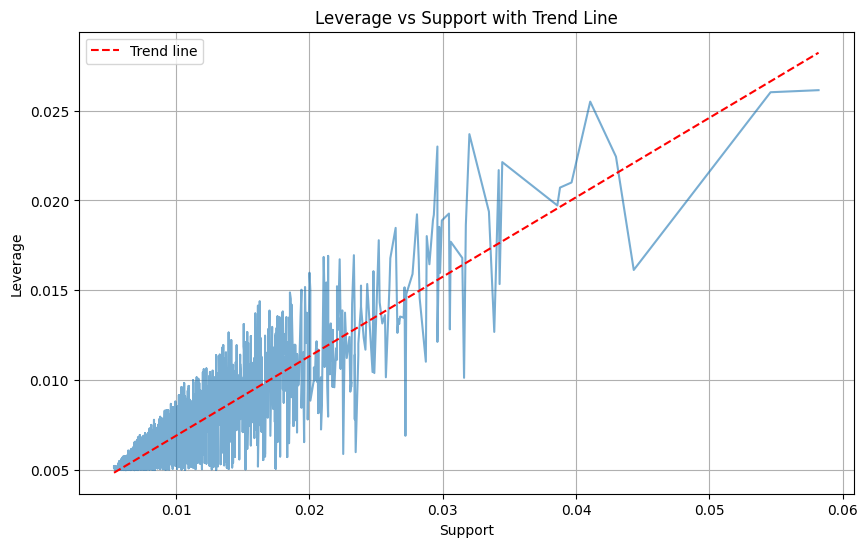

In [72]:
rules_apriori['rule_length'] = rules_apriori['antecedents'].apply(lambda x: len(x)) + rules_apriori['consequents'].apply(lambda x: len(x))

sorted_rules = rules_apriori.sort_values(by='support')

# 1. Plot Leverage vs Support
plt.figure(figsize=(10, 6))
plt.plot(sorted_rules['support'], sorted_rules['leverage'], alpha=0.6)
z = np.polyfit(sorted_rules['support'], sorted_rules['leverage'], 1)
p = np.poly1d(z)
plt.plot(sorted_rules['support'], p(sorted_rules['support']), "r--", label='Trend line')
plt.title('Leverage vs Support with Trend Line')
plt.xlabel('Support')
plt.ylabel('Leverage')
plt.legend()
plt.grid(True)
plt.show()

#### Анализ


1. Трендовая линия подтверждает положительную корреляцию между support и leverage. Это означает, что в среднем, по мере увеличения поддержки правила, также увеличивается его leverage. Данный тренд является логичным, поскольку чем чаще встречается комбинация элементов (support), тем больше её влияние (leverage) на ассоциации.

2. Несмотря на наличие положительного тренда, график показывает разброс значений leverage для одного и того же support. Это может означать, что правила с одинаковой поддержкой могут существенно различаться по степени "силы" связи между элементами.

3. В диапазоне поддержек от 0.01 до 0.02 заметна особенно высокая плотность значений leverage. Это свидетельствует о том, что в этом диапазоне присутствует большое количество правил с разными уровнями "полезности" ассоциаций.

4. По мере увеличения поддержки (более 0.03), разброс leverage становится менее значительным, но остаются пики, что указывает на наличие некоторых особенно сильных ассоциаций, которые имеют как высокую поддержку, так и высокое значение leverage.
В области поддержек выше 0.04 наблюдаются редкие, но значительные отклонения от тренда, что может указывать на наличие особых правил с высокой поддержкой и leverage.


**Основные выводы:**
* Существует положительная корреляция между support и leverage, однако сильные правила (с высоким leverage) могут встречаться даже при низкой поддержке.
* Большой разброс leverage для более низких значений поддержки говорит о том, что не все правила с одинаковой поддержкой одинаково полезны.
* По мере роста поддержки, leverage становится более предсказуемым, но остаются некоторые сильные ассоциации, особенно для правил с высокой поддержкой.

### Диаграмма boxplot leverage в зависимости от длины правила

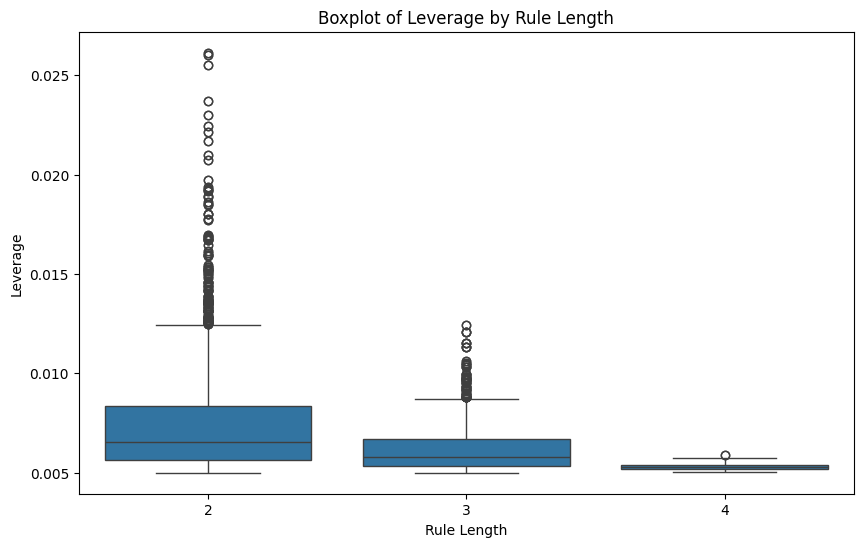

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rule_length', y='leverage', data=rules_apriori)
plt.title('Boxplot of Leverage by Rule Length')
plt.xlabel('Rule Length')
plt.ylabel('Leverage')
plt.show()

#### Анализ

1. **Медианное значение leverage**. Правила длиной 2 имеют наибольшие медианные значения leverage. Это означает, что правила с двумя элементами в среднем оказывают большее влияние на выявленные ассоциации, чем более длинные правила.
Правила длиной 3 и 4 имеют гораздо меньшие медианные значения leverage. Это говорит о том, что по мере увеличения длины правила его "полезность" в среднем уменьшается.

2. **Разброс значений leverage**. Правила длиной 2 имеют самый широкий разброс значений leverage, что подтверждается большим количеством выбросов . Это свидетельствует о том, что некоторые из этих правил могут быть очень сильными ассоциациями.
Правила длиной 3 также имеют заметное количество выбросов, но их разброс уже значительно меньше по сравнению с правилами длины 2.
Правила длиной 4 демонстрируют самый узкий разброс значений leverage, и практически не имеют выбросов. Это может указывать на то, что длинные правила менее вариативны и, как правило, дают слабые ассоциации.

3. **Выбросы**. У правил длиной 2 наблюдается большое количество выбросов с высокими значениями leverage (до 0.025). Это означает, что среди коротких правил могут быть ассоциации с очень сильными связями.
Правила длиной 3 также имеют несколько выбросов, но они гораздо менее значительны по сравнению с правилами длиной 2.
Для правил длиной 4 выбросов практически нет, что указывает на низкую вариативность и относительно слабые ассоциации для длинных правил.

**Общие выводы**:
* Короткие правила (длиной 2) чаще содержат сильные ассоциации с высокими значениями leverage, что делает их более "полезными" для анализа.
* Длинные правила (3 и 4 элемента) имеют меньшую полезность, а их leverage значительно ниже, они более предсказуемо.